# 전국 도시 공원 표준 데이터
    * 전국에 있는 도시 공원들의 데이터를 시간, 결측치,이상치, 수치형, 범주형 데이터를 고르게 보고 다양한 텍스트 데이터를 전처리 해본다.
    * 전처리한 내용을 바탕으로 전국 도시공원에 대한 분포를 시각화 한다.
    

## 환경 설정

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
sns.set(font = "Malgun Gothic", 
        rc = {"axes.unicode_minus" : False},
        style = "darkgrid")

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

In [7]:
# 데이터 불러오기
df = pd.read_csv("data/전국도시공원표준데이터.csv", encoding = "cp949")
df.head()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 19
0,26440-00001,구랑공원,문화공원,NaN,부산광역시 강서구 구랑동 1199-7,35.157215,128.854935,9137.0,4,NaN,화장실,NaN,"팔각정자, 파고라2, 평의자6, 앉음벽14.38m, 축구장(골대2), 컨테이너, 안...",2011-09-02,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN
1,26440-00002,압곡공원,근린공원,NaN,부산광역시 강서구 구랑동 1219,35.154655,128.854727,33756.0,4,NaN,NaN,NaN,"배드민턴장, 족구장, 파고라4, 안내판, 볼라드7, 데크435.11㎡, 데크계단19...",2008-02-28,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN
2,26440-00003,서연정공원,소공원,NaN,부산광역시 강서구 대저1동 1330-7,35.216183,128.969558,646.0,7,NaN,NaN,NaN,"앉음벽13.57m, 트렐리스3, 안내판2, 플랜트2, 파고라, 평의자4",2013-01-23,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN
3,26440-00004,용두공원,어린이공원,NaN,부산광역시 강서구 대저2동 1870-67,35.183679,128.956007,1620.0,NaN,"조합놀이기구, 그네",NaN,NaN,"정자, 농구장, 평의자6",1998-07-25,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN
4,26440-00005,새동내공원,어린이공원,NaN,부산광역시 강서구 대저2동 2407-1,35.174568,128.950612,1009.0,8,"조합놀이기구, 그네, 흔들놀이기구2",NaN,NaN,"정자, 평의자14, 트렐리스2, 안내판, 볼라드",1995-04-07,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN


# 기본 정보

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18137 entries, 0 to 18136
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   관리번호          18137 non-null  object 
 1   공원명           18137 non-null  object 
 2   공원구분          18137 non-null  object 
 3   소재지도로명주소      8039 non-null   object 
 4   소재지지번주소       17158 non-null  object 
 5   위도            18137 non-null  float64
 6   경도            18137 non-null  float64
 7   공원면적          18137 non-null  float64
 8   공원보유시설(운동시설)  4845 non-null   object 
 9   공원보유시설(유희시설)  6964 non-null   object 
 10  공원보유시설(편익시설)  5084 non-null   object 
 11  공원보유시설(교양시설)  1160 non-null   object 
 12  공원보유시설(기타시설)  3116 non-null   object 
 13  지정고시일         15225 non-null  object 
 14  관리기관명         17383 non-null  object 
 15  전화번호          16957 non-null  object 
 16  데이터기준일자       18137 non-null  object 
 17  제공기관코드        18137 non-null  object 
 18  제공기관명         18137 non-nu

In [11]:
#결측치
df.isnull().sum()

관리번호                0
공원명                 0
공원구분                0
소재지도로명주소        10098
소재지지번주소           979
위도                  0
경도                  0
공원면적                0
공원보유시설(운동시설)    13292
공원보유시설(유희시설)    11173
공원보유시설(편익시설)    13053
공원보유시설(교양시설)    16977
공원보유시설(기타시설)    15021
지정고시일            2912
관리기관명             754
전화번호             1180
데이터기준일자             0
제공기관코드              0
제공기관명               0
Unnamed: 19     18137
dtype: int64

In [9]:
df.isnull().mean()

관리번호            0.000000
공원명             0.000000
공원구분            0.000000
소재지도로명주소        0.556762
소재지지번주소         0.053978
위도              0.000000
경도              0.000000
공원면적            0.000000
공원보유시설(운동시설)    0.732867
공원보유시설(유희시설)    0.616034
공원보유시설(편익시설)    0.719689
공원보유시설(교양시설)    0.936042
공원보유시설(기타시설)    0.828197
지정고시일           0.160556
관리기관명           0.041572
전화번호            0.065060
데이터기준일자         0.000000
제공기관코드          0.000000
제공기관명           0.000000
Unnamed: 19     1.000000
dtype: float64

In [10]:
# 결측치 비율 구하기 
# 결측의 평균을 통해 비율을 구하고 100을 곱한다

round(df.isnull().mean()*100,2)

관리번호              0.00
공원명               0.00
공원구분              0.00
소재지도로명주소         55.68
소재지지번주소           5.40
위도                0.00
경도                0.00
공원면적              0.00
공원보유시설(운동시설)     73.29
공원보유시설(유희시설)     61.60
공원보유시설(편익시설)     71.97
공원보유시설(교양시설)     93.60
공원보유시설(기타시설)     82.82
지정고시일            16.06
관리기관명             4.16
전화번호              6.51
데이터기준일자           0.00
제공기관코드            0.00
제공기관명             0.00
Unnamed: 19     100.00
dtype: float64

# 데이터 전처리

## 불필요한 컬럼 제거

In [12]:
df.columns

Index(['관리번호', '공원명', '공원구분', '소재지도로명주소', '소재지지번주소', '위도', '경도', '공원면적',
       '공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명', '전화번호', '데이터기준일자', '제공기관코드', '제공기관명',
       'Unnamed: 19'],
      dtype='object')

In [14]:
df = df.drop(["Unnamed: 19"], axis=1)
df.head(1)

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명
0,26440-00001,구랑공원,문화공원,NaN,부산광역시 강서구 구랑동 1199-7,35.157215,128.854935,9137.0,4,NaN,화장실,NaN,"팔각정자, 파고라2, 평의자6, 앉음벽14.38m, 축구장(골대2), 컨테이너, 안...",2011-09-02,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구


## 결측치 대체

### 도로명 주소와 지번주소
    * 도로명 주소와 지번주소가 둘다 있지 않고 하나만 있을 때 있는 데이터로 결측치 대체

In [15]:
# 도로명 주소 널값 수
df['소재지도로명주소'].isnull().sum()

10098

In [16]:
# 지번 주소의 널값 수
df['소재지지번주소'].isnull().sum()

979

In [17]:
# 모두 결측치가 아닌 데이터 찾기
df[df['소재지도로명주소'].notnull() & df['소재지지번주소'].notnull()].shape

(7060, 19)

In [18]:
# 소재지도로명주소의 결측치를 fillna를 통해 소재지지번주소로 채우기
df["소재지도로명주소"] = df["소재지도로명주소"].fillna(df["소재지지번주소"])
df["소재지도로명주소"].isnull().sum()

0

In [19]:
# 모두 결측치인 데이터를 찾기
df[df['소재지도로명주소'].isnull() & df['소재지지번주소'].isnull()].shape

(0, 19)

## 파생 변수 만들기

### 주소를 통한 시도, 구군 변수 생성

In [20]:
#소재지도로명주소로 시도, 구군 변수 생성하기
#str.split(expand)=true[0]을 통해 공백문자로 분리하고 리스트의 첫번 째 값을 가져오도록하기
df["시도"] = df["소재지도로명주소"].str.split(expand=True)[0]
df[["소재지도로명주소","시도"]].head(3)

,소재지도로명주소,시도
0,부산광역시 강서구 구랑동 1199-7,부산광역시
1,부산광역시 강서구 구랑동 1219,부산광역시
2,부산광역시 강서구 대저1동 1330-7,부산광역시


In [21]:
#구군 가져오기
df["구군"] = df["소재지도로명주소"].str.split(expand=True)[1]
df[["소재지도로명주소","시도", "구군"]].head(3)

,소재지도로명주소,시도,구군
0,부산광역시 강서구 구랑동 1199-7,부산광역시,강서구
1,부산광역시 강서구 구랑동 1219,부산광역시,강서구
2,부산광역시 강서구 대저1동 1330-7,부산광역시,강서구


In [22]:
df["시도"].value_counts()

경기도        3318
전라남도       1882
경상남도       1825
서울특별시      1745
충청남도       1723
전라북도       1137
경상북도        917
충청북도        899
울산광역시       887
인천광역시       675
부산광역시       653
강원도         647
대구광역시       586
대전광역시       497
광주광역시       429
제주특별자치도     246
세종특별자치시      70
강원            1
Name: 시도, dtype: int64

In [23]:
#강원은 강원도로 변경
df["시도"] = df["시도"].replace("강원","강원도")
df["시도"].value_counts()

경기도        3318
전라남도       1882
경상남도       1825
서울특별시      1745
충청남도       1723
전라북도       1137
경상북도        917
충청북도        899
울산광역시       887
인천광역시       675
부산광역시       653
강원도         648
대구광역시       586
대전광역시       497
광주광역시       429
제주특별자치도     246
세종특별자치시      70
Name: 시도, dtype: int64

## 이상치 제거

<AxesSubplot:xlabel='경도', ylabel='위도'>

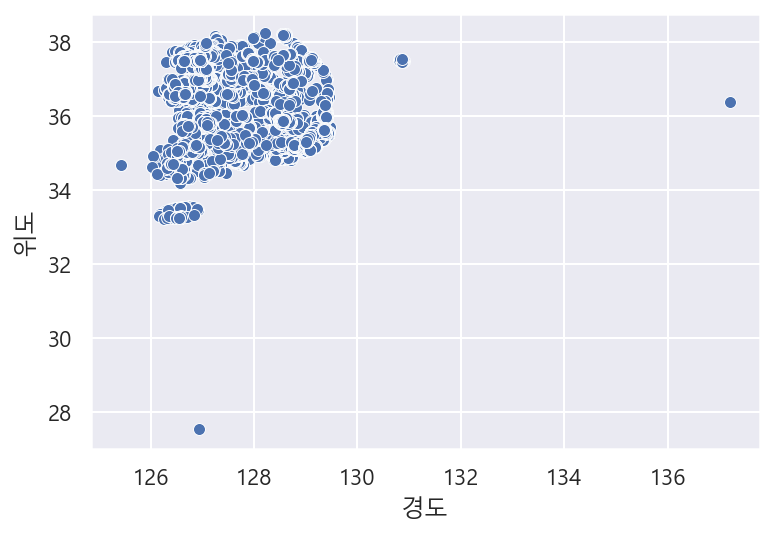

In [24]:
#위경도 시각화
sns.scatterplot(data=df, x="경도", y="위도")

In [25]:
#위 지도로 위도와 경도의 아웃라이어 데이터를 제외하고 출력
#종 더 정확하게 출력하려면 대한민국 위경도 데이터범위를 넣어준다
#이상치를 제거한 데이터를 df_park 라는 새로운 변수에 담습니다.
df_park = df[(df["경도"] < 132) & (df["위도"]>32)].copy()

<AxesSubplot:xlabel='경도', ylabel='위도'>

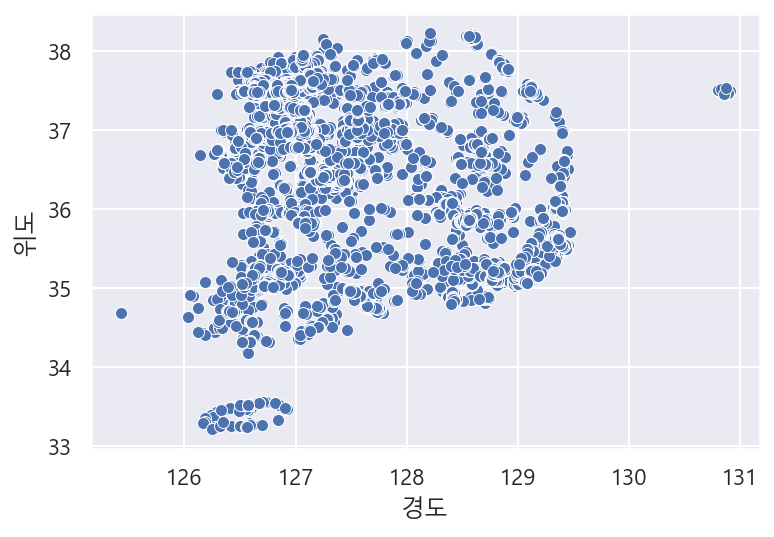

In [26]:
# 위도 경도의 아웃라이어가 제거되었는지 확인
sns.scatterplot(data=df_park, x="경도", y="위도")

## 텍스트 데이터

In [27]:
# 정규표현식 라이브러리 로드
# 설치가 필요 없이 파이썬에 내장
import re

### 공원 보유 시설

In [28]:
# 컬럼이 너무 많으면 끝까지 보이지 않는다.
# options.display를 이용해 max_columns 값을 채워준다
pd.options.display.max_columns = 100

In [29]:
df.head(1)

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,시도,구군
0,26440-00001,구랑공원,문화공원,부산광역시 강서구 구랑동 1199-7,부산광역시 강서구 구랑동 1199-7,35.157215,128.854935,9137.0,4,NaN,화장실,NaN,"팔각정자, 파고라2, 평의자6, 앉음벽14.38m, 축구장(골대2), 컨테이너, 안...",2011-09-02,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,부산광역시,강서구


### 운동 시설
    *텍스트 데이터의 빈도수를 구한다
    *한 컬럼에 여러 텍스트가, 혹은 -등의 특수문자로 구분되어 있다.
    *데이터 전처리를 통해 텍스트 빈도수를 구한다.

In [31]:
df["공원보유시설(운동시설)"].value_counts(sort=False).head(5)

족구장, 농구장, 배드민턴장, 축구장, 인라인장    1
운동기구2,농구대2                    1
베드민턴장, 야외운동시설                 1
평행봉1                          2
운동기구 4                        3
Name: 공원보유시설(운동시설), dtype: int64

In [32]:
# "공원보유시설(운동시설)"의 unique 값을 구하고 리스트 형태로 만든다
# 그리고 다시 str 형태로 변경하고 gym이라는 변수에 담는다
gym = df["공원보유시설(운동시설)"].unique().tolist()
gym = str(gym)
gym[:1000]

"['4', '7', nan, '8', '5', '6', '3', '10', '14', '9', '30', '2', '13', '12', '40', '17', '-', '농구장', '궁도장', '풋살구장', '풋살구장, 농구장, 인라인스케이트장', '축구장', '족구장', '게이트볼장', '운동기구14개, 농구장2개소, 족구장1개소', '운동기구6개, 족구장1개소', '운동기구10개', '운동기구4개', '운동기구7개', '에어로빅장, 농구장', '테니스장, 씨름장, 농구장', '바디싣업1,스트레칭롤러1,전신돌리기1,허리안마기1,허리비틀기1', 'TM스탭사이클1,TM체어웨이트1,TM트윈바디싣업1,TM트윈트위스트1,TM크로스컨트리1,TM풀웨이트1', '철봉1', '하늘걷기1,마라톤운동1,허리돌리기1,3단철봉,윗몸일으키기1', '철봉1,팔굽혀펴기1,몸통돌리기1,허리좌우로흔들기1', '스트레칭롤러1,풀웨이트1,바웨이트1', '하늘걷기1,온몸허리돌리기1,스트레칭기1,거꾸로매달리기1', '하늘걷기1,온몸허리돌리기1,등허리지압기1,철봉3', '스탭싸이클1,풀웨이트1,트리플트위스트2,트윈바디싣업1,크로스컨트리1,스트레칭롤러1,트윈워밍암1', '하늘걷기2,스탭싸이클1,체어폴1,철봉1,트리플트위스트2,트윈바디싣업1', '윗몸일으키기1,온몸허리돌리기1,팔굽혀펴기1,다리뻗치기1,온몸허리돌리기1,거꾸로매달리기1', '하늘걷기1,온몸허리돌리기1,옆파도타기1', '크로스워킹+스카이워킹1,파워프레스+풀웨이트1,싸이클론+트위스트1,스탠드업+마사지롤1,사이드스윙+터닝암1,푸시웨이트+레그프레스1', '평행봉1', '트윈바디싣업1,트윈트위스트1,스탭싸이클1,크로스컨트리1,체어풀1', '크로스컨트리1,자전거팔뻗기2,등안마기1,트윈워밍암1,체어웨이트1,오버턴스트레칭1', '크로스컨트리1,롤링웨이스트1,레그프레스1,트윈트위스트1,체어웨이트1', '족구장1,역기1', '등지압기1,마라톤운동+공중걷기운동1,허리돌리기+온몸돌리기1, 온몸역기올리기+온몸근육풀기1', '트리플트위스트1,트윈바디싣업1,크로스컨

In [33]:
#replace 기능을 사용해서 , 를 빈문자로 공백을 , 로 +를 , 로 변경합니다
gym = gym.replace("+", ",").replace("'", ",").replace(" ", ",").replace("＼", ",")
gym[:1000].replace(" ", ",")

'[,4,,,,7,,,nan,,,8,,,,5,,,,6,,,,3,,,,10,,,,14,,,,9,,,,30,,,,2,,,,13,,,,12,,,,40,,,,17,,,,-,,,,농구장,,,,궁도장,,,,풋살구장,,,,풋살구장,,농구장,,인라인스케이트장,,,,축구장,,,,족구장,,,,게이트볼장,,,,운동기구14개,,농구장2개소,,족구장1개소,,,,운동기구6개,,족구장1개소,,,,운동기구10개,,,,운동기구4개,,,,운동기구7개,,,,에어로빅장,,농구장,,,,테니스장,,씨름장,,농구장,,,,바디싣업1,스트레칭롤러1,전신돌리기1,허리안마기1,허리비틀기1,,,,TM스탭사이클1,TM체어웨이트1,TM트윈바디싣업1,TM트윈트위스트1,TM크로스컨트리1,TM풀웨이트1,,,,철봉1,,,,하늘걷기1,마라톤운동1,허리돌리기1,3단철봉,윗몸일으키기1,,,,철봉1,팔굽혀펴기1,몸통돌리기1,허리좌우로흔들기1,,,,스트레칭롤러1,풀웨이트1,바웨이트1,,,,하늘걷기1,온몸허리돌리기1,스트레칭기1,거꾸로매달리기1,,,,하늘걷기1,온몸허리돌리기1,등허리지압기1,철봉3,,,,스탭싸이클1,풀웨이트1,트리플트위스트2,트윈바디싣업1,크로스컨트리1,스트레칭롤러1,트윈워밍암1,,,,하늘걷기2,스탭싸이클1,체어폴1,철봉1,트리플트위스트2,트윈바디싣업1,,,,윗몸일으키기1,온몸허리돌리기1,팔굽혀펴기1,다리뻗치기1,온몸허리돌리기1,거꾸로매달리기1,,,,하늘걷기1,온몸허리돌리기1,옆파도타기1,,,,크로스워킹,스카이워킹1,파워프레스,풀웨이트1,싸이클론,트위스트1,스탠드업,마사지롤1,사이드스윙,터닝암1,푸시웨이트,레그프레스1,,,,평행봉1,,,,트윈바디싣업1,트윈트위스트1,스탭싸이클1,크로스컨트리1,체어풀1,,,,크로스컨트리1,자전거팔뻗기2,등안마기1,트윈워밍암1,체어웨이트1,오버턴스트레칭1,,,,크로스컨트리1,롤링웨이스트1,레그프레스1,트윈트위스트1,체어웨이트1,,,,족구장1,역기1,,,,등지압기1,마라톤운동,공중걷기운동1,허리돌리기,온몸돌리기1,,온몸역기올리기,온몸근육풀기1,,,,트리플트위스트1,트윈바디싣업1,크로스컨

In [34]:
#제거할 특수문자를 빈문자로 대체
#숫자와 .을 제거
#\d, \.
gym = re.sub("[\[\d\-nan\.\]]", "", gym)
gym = re.sub(",{2,}", ",", gym)
gym[:1000]

',농구장,궁도장,풋살구장,풋살구장,농구장,인라인스케이트장,축구장,족구장,게이트볼장,운동기구개,농구장개소,족구장개소,운동기구개,족구장개소,운동기구개,운동기구개,운동기구개,에어로빅장,농구장,테니스장,씨름장,농구장,바디싣업,스트레칭롤러,전신돌리기,허리안마기,허리비틀기,TM스탭사이클,TM체어웨이트,TM트윈바디싣업,TM트윈트위스트,TM크로스컨트리,TM풀웨이트,철봉,하늘걷기,마라톤운동,허리돌리기,단철봉,윗몸일으키기,철봉,팔굽혀펴기,몸통돌리기,허리좌우로흔들기,스트레칭롤러,풀웨이트,바웨이트,하늘걷기,온몸허리돌리기,스트레칭기,거꾸로매달리기,하늘걷기,온몸허리돌리기,등허리지압기,철봉,스탭싸이클,풀웨이트,트리플트위스트,트윈바디싣업,크로스컨트리,스트레칭롤러,트윈워밍암,하늘걷기,스탭싸이클,체어폴,철봉,트리플트위스트,트윈바디싣업,윗몸일으키기,온몸허리돌리기,팔굽혀펴기,다리뻗치기,온몸허리돌리기,거꾸로매달리기,하늘걷기,온몸허리돌리기,옆파도타기,크로스워킹,스카이워킹,파워프레스,풀웨이트,싸이클론,트위스트,스탠드업,마사지롤,사이드스윙,터닝암,푸시웨이트,레그프레스,평행봉,트윈바디싣업,트윈트위스트,스탭싸이클,크로스컨트리,체어풀,크로스컨트리,자전거팔뻗기,등안마기,트윈워밍암,체어웨이트,오버턴스트레칭,크로스컨트리,롤링웨이스트,레그프레스,트윈트위스트,체어웨이트,족구장,역기,등지압기,마라톤운동,공중걷기운동,허리돌리기,온몸돌리기,온몸역기올리기,온몸근육풀기,트리플트위스트,트윈바디싣업,크로스컨트리,체어웨이트,롤링웨이스트,레그프레스,오버턴스트레칭,윗몸일으키기,트리플트위스트,평행봉,크로스컨트리,레그프레스,체어웨이트,롤링웨이스트,트윈바디싣업,레그스트레칭,크로스컨트리,어깨근육풀기,체어웨이트,트윈바디싣업(구형),트리플트위스트(구형),게이트볼장,운동시설,축구장,족구장,족구장,운동기구,운동기구,축구장,배드민턴장,농구장,배드민턴장,족구장,농구대,배드민턴장,배드민턴장,농구대,농구장,개소,배드민턴장,게이트볼장,개소,체력단련시설,개소,기,등,배드민턴장,개소,체력단련시설,개소,개,배드민턴장,개소,농구장,개소,체력단련시설,개소,개,다목

In [35]:
gym_count = pd.Series(gym.split(",")).value_counts()
gym_count.head()

배드민턴장     219
농구장       215
운동기구      185
게이트볼장     156
체력단련시설    148
dtype: int64

<AxesSubplot:>

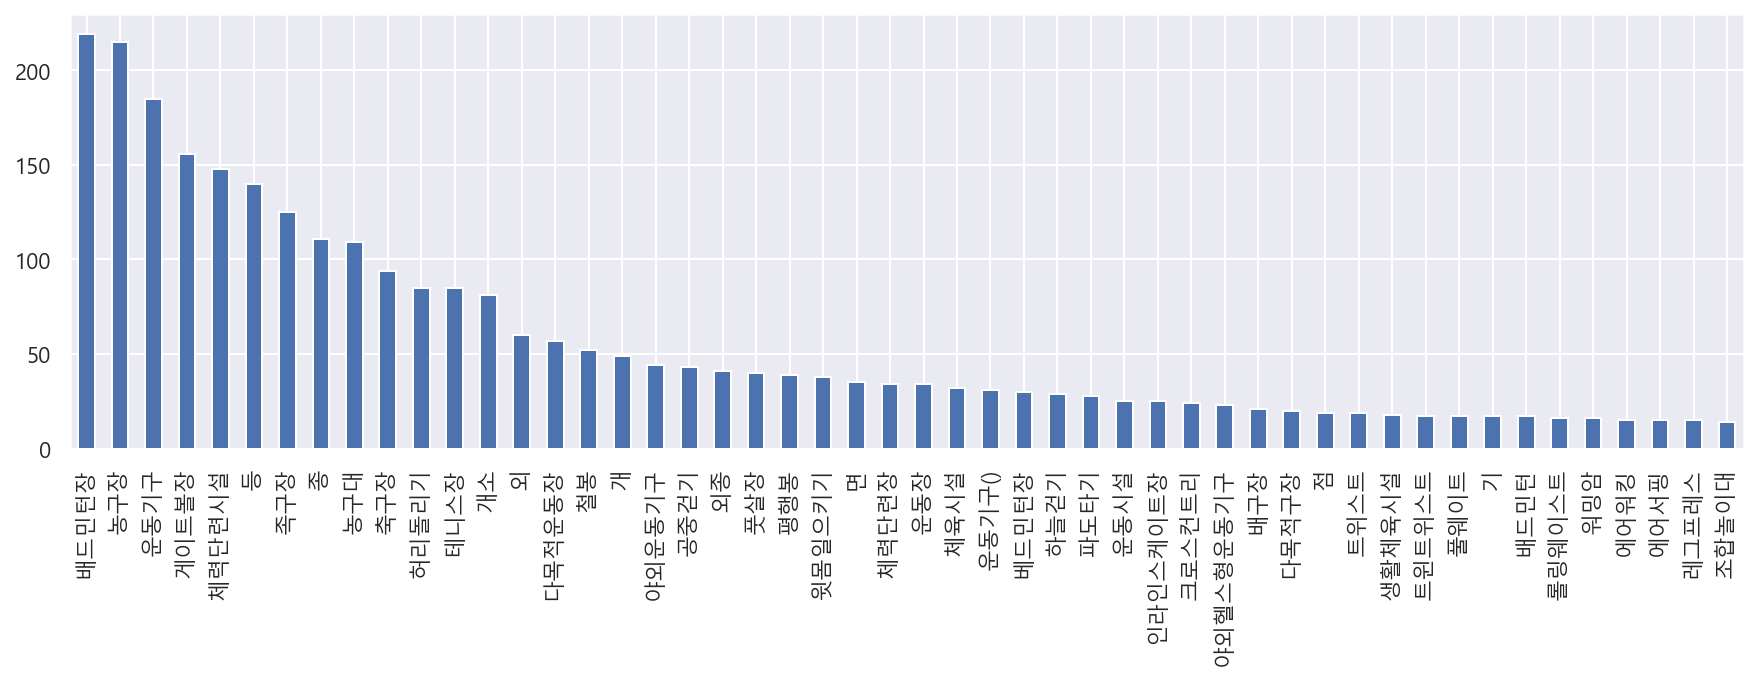

In [36]:
#상위 50개 단어에 대한 그래프 그리기
gym_count.head(50).plot.bar(figsize=(15,4))

### 워드클라우드로 빈도수 표현

In [37]:
from wordcloud import WordCloud

def wordcloud(data, width = 1200, height=500):
    word_draw = WordCloud(
        font_path=r"C:\Windows\Fonts\malgun.ttf",
        stopwords=["운동기구", "개소", "외종"],background_color = "white", width=width, height = height
    )
    word_draw.generate(data)
    plt.figure(figsize=(15,5))
    plt.imshow(word_draw)
    plt.axis("off")
    plt.show()

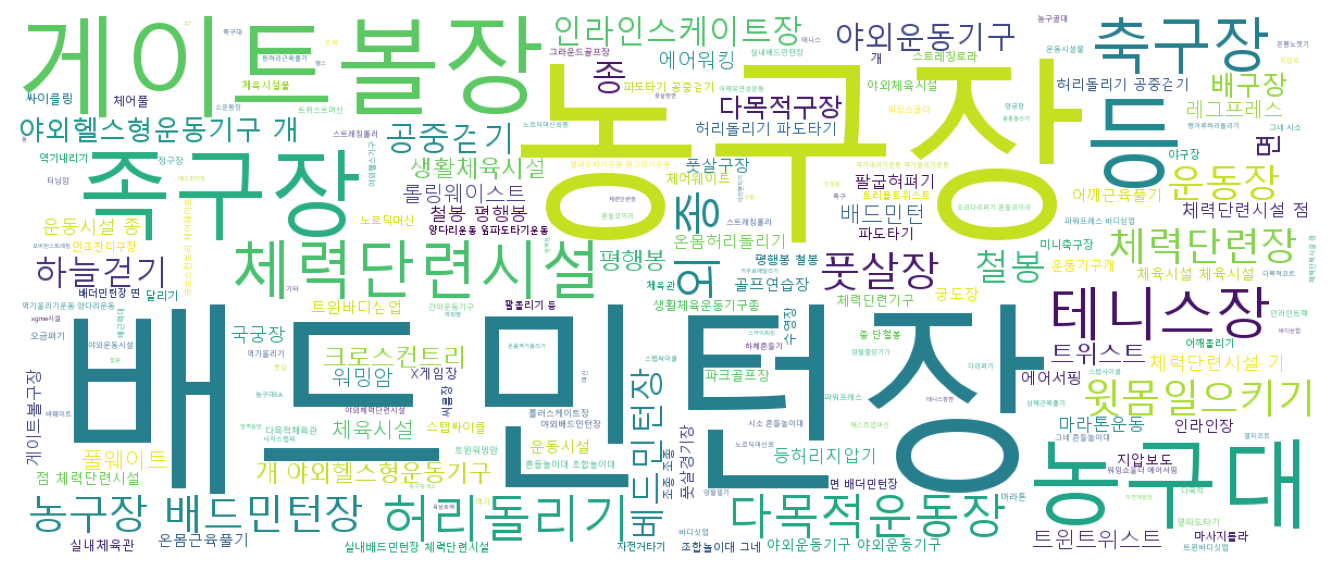

In [38]:
wordcloud(gym)

### 편익 시설

In [39]:
#편익시설에서 필요없는 문자를 제거하고 
#토큰화를 위해 각 시설을 , 로 구분하도록 전처리를 하는 함수 구현

def get_string(text):
    if pd.isna(text):
        return text
  
    text = re.sub("[\d\.'\-(nan)\[\]\/]", "", text)
    text = re.sub(" ","",text)
    text = re.sub(",{2,}", ",", text)
    return text

In [40]:
#함수 구현 확인
get_string("[1. '화장실' 5, 2. 주차장, -, nan. /]")

'화장실,주차장,'

In [41]:
#결측치를 넣어본다. 오류나는지 확인
get_string(np.nan)

nan

In [42]:
df["편익시설"] = df["공원보유시설(편익시설)"].map(get_string)
df["편익시설"].head()

0    화장실
1    NaN
2    NaN
3    NaN
4    NaN
Name: 편익시설, dtype: object

In [43]:
df["편익시설"].value_counts().tail()

주차시설                1
어린이놀이터개소            1
화장실,상수도관,파고라,벤치     1
화장실주차장벤치정각          1
주차장,전망대,화장실,등의자등    1
Name: 편익시설, dtype: int64

In [44]:
#문자열을 연결해주는 join으로 편익시설을 연결해 주는 방법이 있다.
#이때 결측치가 있으면 결측치는 숫자형태이기 때문에 문자와 연결되지 않아 오류가 난다.
#따라서 결측치를 제외한 값만 가져와서 연결

",".join(df.loc[df["편익시설"].notnull(), "편익시설"])


'화장실,화장실,화장실,주차장,관리사무소,화장실,화장실,화장실,주차장,화장실,주차장,화장실,주차장,문화회관,화장실,화장실,화장실,음수전,음수전,주차장,주차장,화장실,,,,화장실,,,,,,,,,,,,,,,,,,,,주차장,화장실,화장실,화장실,화장실,주차장,화장실,화장실,주차장,화장실,축구장,화장실,주차장,화장실,주차장,화장실,주차장,화장실,주차장,야영장,운동장,화장실,주차장,화장실,주차장,주차장,화장실,화장실,주차장,화장실,화장실,주차장,무대,화장실,주차장,주차장,화장실,주차장,화장실,저수지,산책로,축구장,주차장,주차장,주차장,화장실,주차장,화장실,주차장,화장실개소,어린이놀이터개소,화장실개소,어린이놀이터개소,어린이놀이터개소,주차장,화장실,화장실,주차장,화장실,주차장,화장실,화장실,대피소,사무소,약수터,교량,통제소,화장실,파고라,탐방지원센터,정보문화센터,배드민턴장,인조잔디축구장,배구장,배드민턴장,테니스장,휴게광장,체력단련장,청소년문화회관,화장실,조합놀이대,배드민턴장,조합놀이대,의자등,조합놀이대,의자등,조합놀이대,의자,바닥분수등,조합놀이대,의자,바닥분수등,조합놀이대,의자등,조합놀이대,의자,바닥분수등,조합놀이대,의자,의자,운동기구등,조합놀이대,의자,바닥분수등,조합놀이대,의자,바닥분수등,조합놀이대,의자등,조합놀이대,의자,바닥분수등,조합놀이대,의자,바닥분수등,조합놀이대,의자,바닥분수등,조합놀이대,의자등,의자,운동기구등,조합놀이대,의자등,조합놀이대,의자,바닥분수등,조합놀이대,의자등,조합놀이대,의자등,조합놀이대,의자등,조합놀이대,의자,화장실등,모험놀이,의자등,모험놀이,의자등,조합놀이대,의자,화장실등,조합놀이대,의자등,조합놀이대,의자,화장실등,조합놀이대,의자등,조합놀이대,의자,화장실등,조합놀이대,그네,화장실등,조합놀이대,의자등,조합놀이대,의자등,조합놀이대,의자,바닥분수등,조합놀이대,의자등,조합놀이대,의자,벽천분수등,조합놀이대,의자등,조합놀이대,의자등,조합놀이대,의자등,조합놀이대,의자,바닥분수등,자판기,화장실,화장실,화장실,파고라,평의자,등의자,원형쉘터,평의자,오두막,평벤치,등

In [45]:
#위에서 전처리한 "편익시설"컬럼을 리스트 형태로 만들고 다시 str로 변환
#위에서 만든 get_string 함수로 전처리
fac = str(df["편익시설"].tolist())
fac = get_string(fac)
fac[:100]

'화장실,화장실,화장실,주차장,관리사무소,화장실,화장실,화장실,주차장,화장실,주차장,화장실,주차장,문화회관,화장실,화장실,화장실,음수전,음수전,주차장,주차장,화장실,화장실,주차장,화'

In [46]:
# , 가 2개 이상 들어가면 하나로 변경
re.sub(",{2,}",",",'화장실,주차장,,,')

'화장실,주차장,'

In [47]:
#다시 ","로 텍스트를 분리하고 판다스 series 형태로 만들고 value_counts로 빈도수 계산
fac_count = pd.Series(fac.split(",")).value_counts()
fac_count.head()

화장실    1921
파고라     817
벤치      650
정자      535
주차장     502
dtype: int64

<AxesSubplot:>

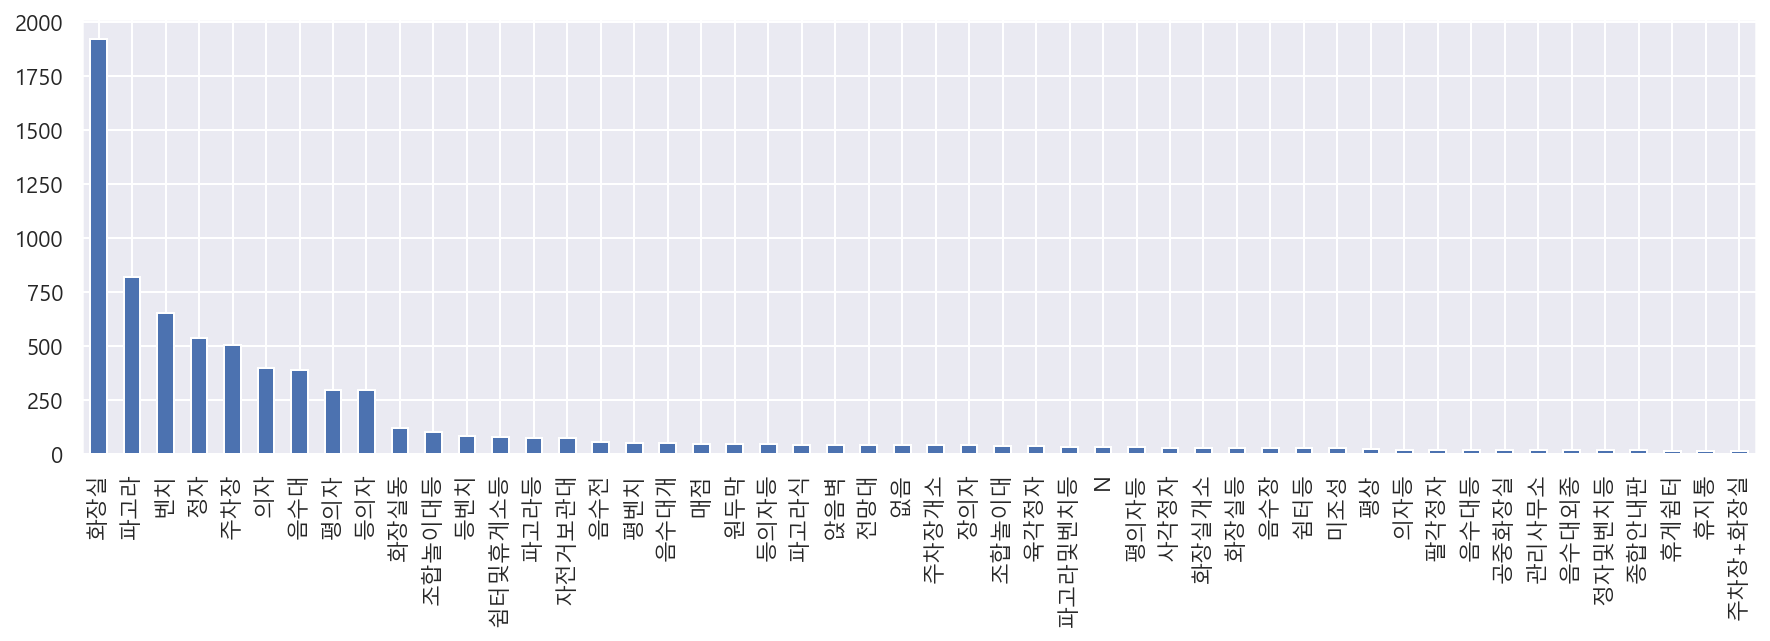

In [48]:
# 상위 50개 단어에 대해 막대그래프를 그린다
fac_count.head(50).plot.bar(figsize=(15,4))

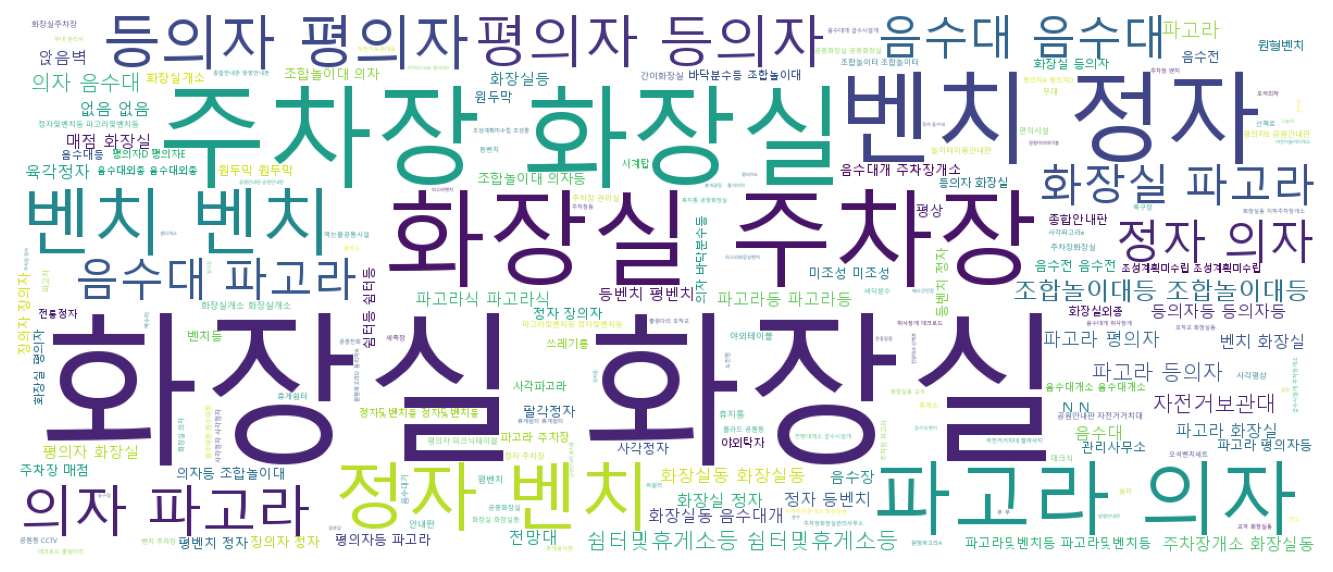

In [49]:
wordcloud(fac)

### 키워드별 빈도수 구하기
    *위에 빈도수를 보니 파고라, 파고라등 이라는 두개의 단어가 다른 빈도로 세어짐
    *화장실, 화장실동, 공중화장실 등 다양한 텍스트가 있다
    *일일이 전처리 힘듬
    *그래서 보고자하는 키워드를 넣고 빈도수를 구하는게 더 전처리하는 작업보다 빠름
    *여기서 운동시설이나 편의시설이 있는데 특정 시설을 키워드에 넣고 구하는 방법사용

In [50]:
#"공원보유시설(편익시설)"에서 문자열 처리를 하기 위해 결측치를 제외한 값을 가져온다
facilities=["화장실", "주차장", "음수대", "파고라", "정자", "벤치", "의자", "놀이터", "축구장", "야영장", "CCTV"]

df_fac = df[df["공원보유시설(편익시설)"].notnull()]

In [51]:
#facilities 리스트에 있는 값으로 for문을 활용해 컬럼을 만든다
#해당 단어가 들어가면 True, 아니면 False로 값이 표현

for f in facilities:
    df[f] = df_fac["공원보유시설(편익시설)"].str.contains(f)


In [52]:
df[facilities].sum()

화장실     2208.0
주차장      611.0
음수대      493.0
파고라     1032.0
정자       648.0
벤치       850.0
의자       949.0
놀이터       21.0
축구장        6.0
야영장        3.0
CCTV       6.0
dtype: float64

# 데이터 요약

## 수치형, 범주형 변수 구분하기

In [53]:
#data_types 변수에 데이터 타입만 따로 모으기
data_types = df.dtypes
data_types[:5]

관리번호        object
공원명         object
공원구분        object
소재지도로명주소    object
소재지지번주소     object
dtype: object

## 수치형 변수 요약

In [54]:
var_numbers = data_types[data_types != object]
var_numbers = var_numbers.index.tolist()
var_numbers

['위도', '경도', '공원면적']

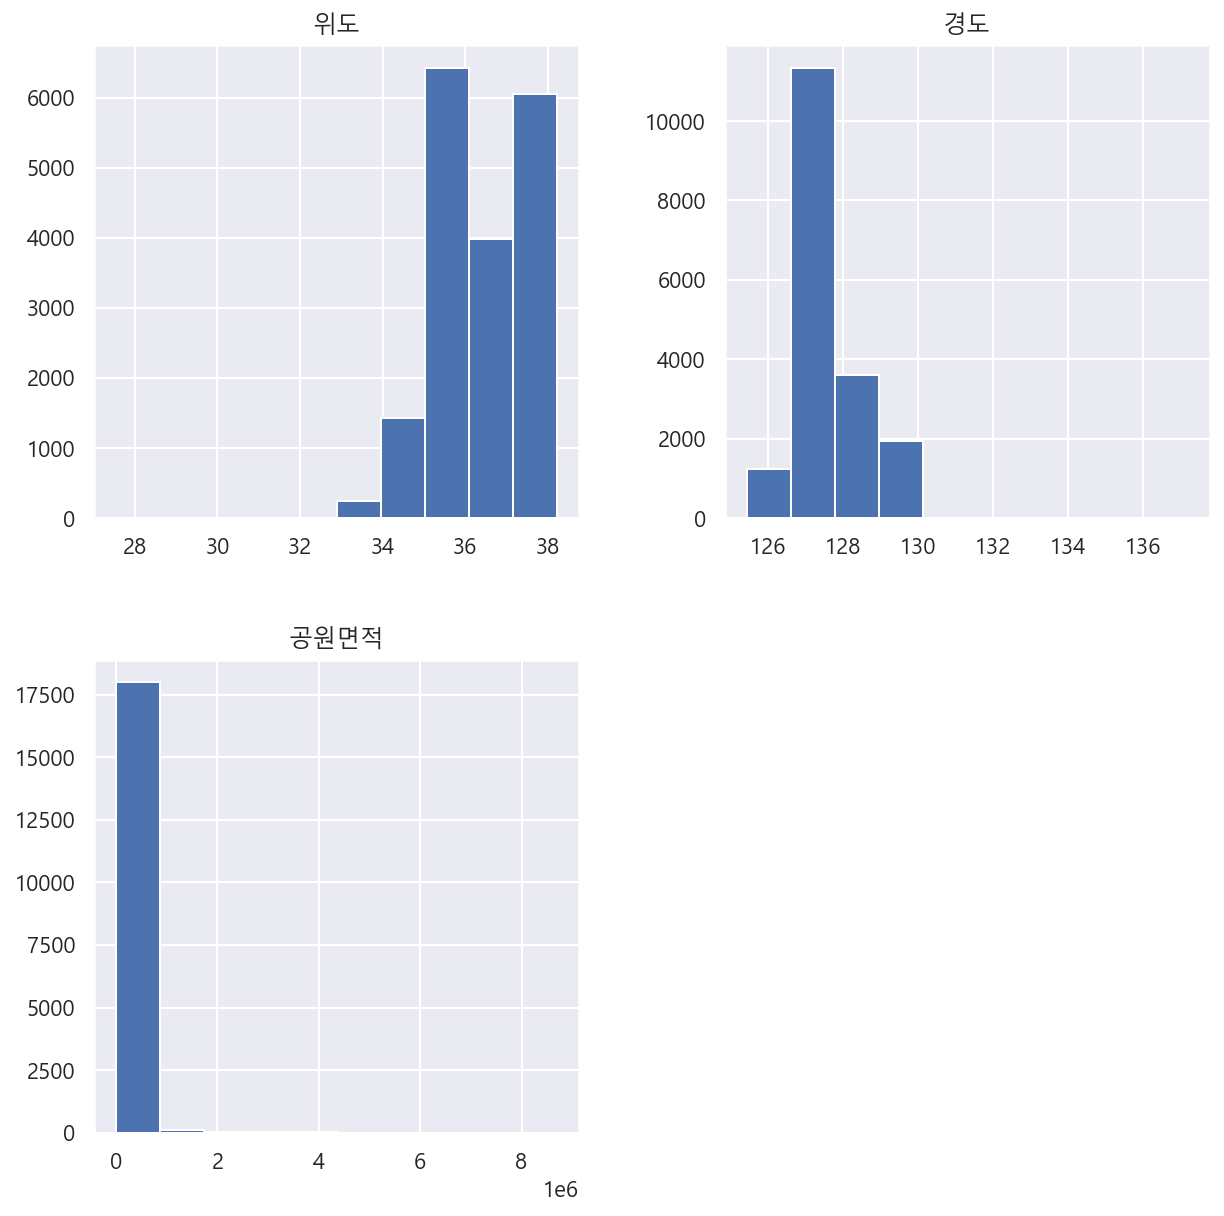

In [55]:
h = df.hist(figsize=(10,10))

In [56]:
df.describe()

,위도,경도,공원면적
count,18137.000000,18137.000000,1.813700e+04
mean,36.335922,127.543937,3.781196e+04
std,1.051835,0.892670,2.203052e+05
min,27.551606,125.430955,0.000000e+00
25%,35.275430,126.872301,1.503000e+03
50%,36.364729,127.130926,2.159000e+03
75%,37.404278,128.466193,1.025460e+04
max,38.224926,137.202661,8.703000e+06


## 범주형 변수 요약

In [57]:
var_object = data_types[data_types == object]
var_object = var_object.index.tolist()
var_object[:5]

['관리번호', '공원명', '공원구분', '소재지도로명주소', '소재지지번주소']

In [58]:
df.describe(include = "object")

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,시도,구군,편익시설,화장실,주차장,음수대,파고라,정자,벤치,의자,놀이터,축구장,야영장,CCTV
count,18137,18137,18137,18137,17158,4845,6964,5084,1160,3116,15225,17383,16957,18137,18137,18137,18137,18137,5084,5084,5084,5084,5084,5084,5084,5084,5084,5084,5084,5084
unique,14710,12423,10,15186,14419,1485,1237,1102,378,993,3470,279,497,112,219,219,17,232,730,2,2,2,2,2,2,2,2,2,2,2
top,31110-60001,공원,어린이공원,전라남도 무안군 삼향읍 남악리 미지정 간척지,전라남도 무안군 삼향읍 남악리 미지정 간척지,운동기구,조합놀이대,화장실,-,-,2007-11-26,경상남도 창원시청,055-212-4501,2019-09-24,5670000,경상남도 창원시,경기도,창원시,화장실,False,False,False,False,False,False,False,False,False,False,False
freq,124,145,9987,18,18,360,1526,1037,250,141,132,1176,344,1344,1176,1176,3318,1176,1086,2876,4473,4591,4052,4436,4234,4135,5063,5078,5081,5078


## crosstab

In [59]:
# 관리기관과 공원구분에 따른 빈도수를 구한다
# 결과가 많기 때문에 "체육공원"을 5개 이상 관리하는 기관명만 따로 뽑는다
# 숫자가 많고 적음 표시를 위해 style.background_gradient()를 사용한다
# 결과를 manage_category 변수에 담는다
manage_category = pd.crosstab(index=df["관리기관명"], columns = df["공원구분"])
manage_category[manage_category["체육공원"]> 5].style.background_gradient()

공원구분,근린공원,기타,도시농업공원,묘지공원,문화공원,소공원,수변공원,어린이공원,역사공원,체육공원
관리기관명,,,,,,,,,,
경기도 김포시 체육과,0,0,0,0,0,0,0,0,0,7
경기도 남양주시청,33,0,0,2,5,25,4,68,4,6
경기도 시흥시청,37,0,1,0,7,6,3,72,0,6
경상남도 창원시청,224,0,0,8,8,100,0,816,0,20
대전광역시 대덕구청,11,1,0,0,3,8,0,50,1,6
성남시 공원과,50,0,0,1,0,0,0,0,2,6
전라남도 장성군청,14,0,0,0,4,118,2,10,2,6


In [60]:
# "시도"별 "공원구분"의 수를 구한다

city_caregory = pd.crosstab(index=df["시도"], columns=df["공원구분"])
city_caregory.style.background_gradient()

공원구분,근린공원,기타,도시농업공원,묘지공원,문화공원,소공원,수변공원,어린이공원,역사공원,체육공원
시도,,,,,,,,,,
강원도,141,0,2,1,8,85,10,391,4,6
경기도,806,17,1,8,91,406,61,1821,34,73
경상남도,390,0,3,8,25,178,17,1161,12,31
경상북도,178,3,0,0,18,100,26,575,11,6
광주광역시,97,0,0,0,0,18,5,305,1,3
대구광역시,125,0,0,0,5,57,6,381,2,10
대전광역시,99,1,0,1,12,47,12,315,1,9
부산광역시,144,16,1,2,14,96,9,365,3,3
서울특별시,332,70,4,1,19,183,4,1117,11,4


## 시도별 공원 분포

### 시도별 공원 비율

In [61]:
# 시도별로 합계 데이터를 출력
city_count = df["시도"].value_counts().to_frame()
city_mean = df["시도"].value_counts(normalize=True).to_frame()
city_count.head()

,시도
경기도,3318
전라남도,1882
경상남도,1825
서울특별시,1745
충청남도,1723


In [62]:
# 합계와 비율을 함께 구하기

city = city_count.merge(city_mean, left_index=True, right_index = True)
city.columns = ["합계", "비율"]
city.style.background_gradient()

,합계,비율
경기도,3318,0.182941
전라남도,1882,0.103766
경상남도,1825,0.100623
서울특별시,1745,0.096212
충청남도,1723,0.094999
전라북도,1137,0.062690
경상북도,917,0.050560
충청북도,899,0.049567
울산광역시,887,0.048906
인천광역시,675,0.037217


### 공원 구분별 분포

<AxesSubplot:xlabel='경도', ylabel='위도'>

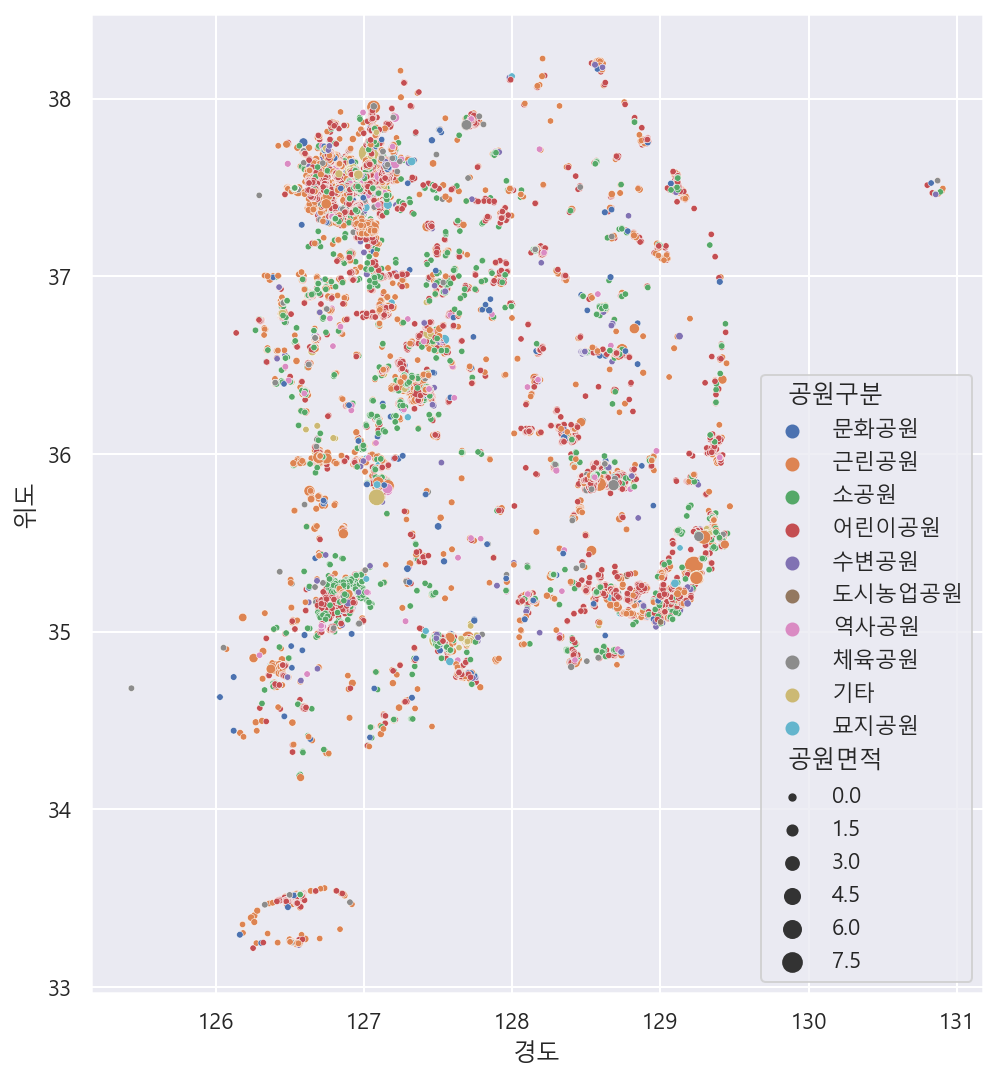

In [63]:
#"공원구분"별로 색상을 다르게 표현하고 "공원면적"에 따라 원의 크기를 다르게 그린다
# 제주도는 해안선과 유사한 모습으로 공원이 배치되어있는 모습
# df에는 전체 데이터 프레임이 df_park 에는 위경도의 이상치를 제거한 데이터가 들어있다.
plt.figure(figsize= (8,9))
sns.scatterplot(data=df_park, x="경도", y= "위도", hue="공원구분", size = "공원면적", sizes = (10,100))

### 시도별 공원분포

<AxesSubplot:xlabel='경도', ylabel='위도'>

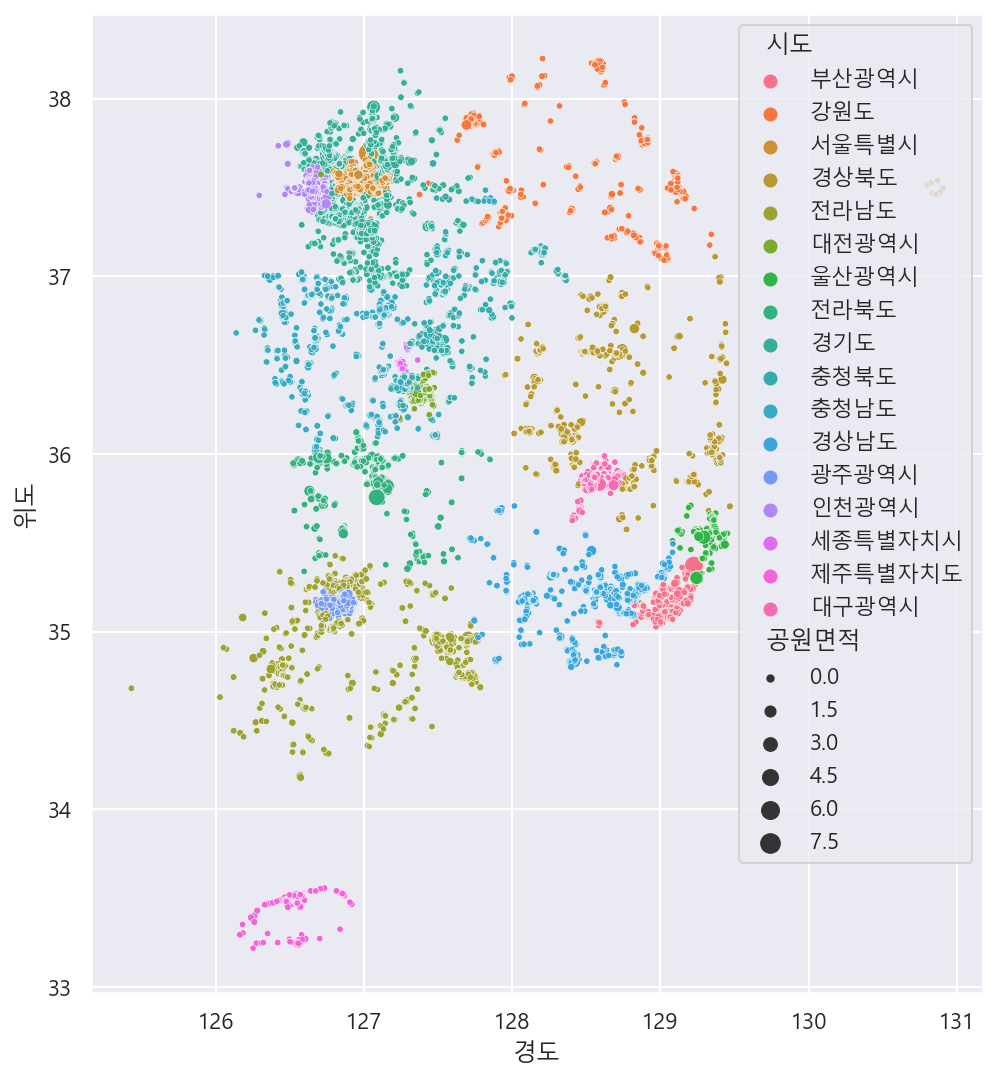

In [64]:
plt.figure(figsize= (8,9))
sns.scatterplot(data=df_park, x="경도", y= "위도", hue="시도", size = "공원면적", sizes = (10,100))

<AxesSubplot:xlabel='count', ylabel='시도'>

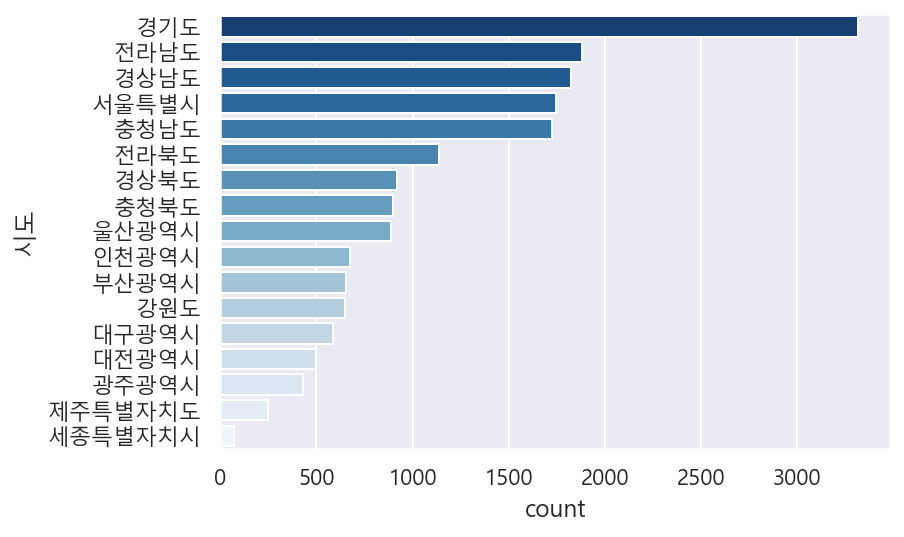

In [65]:
# countplot으로 시도별 빈도수를 그린다.
sns.countplot(data=df, y="시도", order = city_count.index, palette="Blues_r")

### 피봇테이블로 시도별 공원수와 평균면적 구하기

In [77]:
park_size = pd.pivot_table(df, index = "시도", values="공원면적",
              aggfunc=["count","mean","median"])
park_size.style.background_gradient()

,count,mean,median
,공원면적,공원면적,공원면적
시도,,,
강원도,648,29539.004630,1886.500000
경기도,3318,27628.744093,2527.900000
경상남도,1825,51390.226795,2163.000000
경상북도,917,29771.096947,2146.000000
광주광역시,429,20571.033333,2192.000000
대구광역시,586,28622.956143,2044.150000
대전광역시,497,36507.091952,2069.100000
부산광역시,653,54162.930521,2158.000000


### 내가 사는 지역의 공원을 지도에 표시

In [78]:
df_sn = df[(df["시도"] == "경기도") & (df["구군"] == "안산시")]
df_sn.shape

(196, 33)

In [79]:
df_sn[["시도", "구군", "공원명"]].head()

,시도,구군,공원명
14938,경기도,안산시,각골공원
14939,경기도,안산시,반월공원
14940,경기도,안산시,상록수공원
14941,경기도,안산시,본오공원
14942,경기도,안산시,오목골공원


In [80]:
df_sn.loc[df_sn["공원명"].str.contains("호수"), ["공원명","위도", "경도"]]

,공원명,위도,경도
14980,호수공원,37.30211,126.830076


In [81]:
cols = "공원보유시설(운동시설)	공원보유시설(유희시설)	공원보유시설(편익시설)	공원보유시설(교양시설)"
cols = cols.split("\t")
df_sn.loc[df_sn["공원명"].str.contains("호수"), cols ]

,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설)
14980,"축구장,농구장,배구장,인라인장","놀이터,그네,미끄럼틀","주차장,화장실",야외이벤트장


In [82]:
import folium
m = folium.Map([37.30211,126.830076], zoom_start = 13)

for n in df_sn.index:
    lat = df_sn.loc[n, "위도"]
    long = df_sn.loc[n, "경도"]
    tooltip = df_sn.loc[n, "공원명"] + df_sn.loc[n, "소재지도로명주소"]
    folium.Marker([lat, long], tooltip = tooltip).add_to(m)
m